## Машинное обучение

## Домашнее задание 3


### О задании

Ниже даны несколько заданий. Первые два из них самодостаточные, они позволяют лучше познакомиться с логистической регрессией и ROC-кривой. Далее 3 задания выполняются на реальном наборе данных: вам предлагается настроить логистическую регрессию на них, измерить различные метрики качества, попробовать закодировать категориальные признаки и посмотреть на изменение качества предсказаний. Также в последнем задании предлагается самостоятельно разобраться с методами калибровки вероятностей. 

В каждом задании указано число баллов. Почти все задание основано на использовании готовых методов из sklearn и анализе результатов их работы.

In [235]:
%pylab inline
import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\-\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Задание 1. Обучение логистической регресии на синтетических данных. (2 балла)

Сгенерируйте синтетический датасет для бинарной классификации с помощью `make_classification` с 2 признаками, обучите на нём логистическую регресию. Визуализируйте разделяющую прямую и все объекты. Из иллюстрации должно быть понятно, к какому классу принадлежит объект, и к какому классу его отнесла регресия (это удобно демонстрировать заливкой цветом). 

In [236]:
np.random.seed(22)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2)
df = pd.DataFrame(np.hstack((X,y.reshape((-1,1)))))
df

,0,1,2
0,1.044002,1.420714,1.0
1,1.301111,-0.781383,0.0
2,-0.956017,1.187434,1.0
3,-1.179312,1.089880,1.0
4,-1.275838,-0.828703,0.0
5,-0.685841,1.138445,1.0
6,-1.067535,-1.027485,0.0
7,-1.822367,-0.547124,0.0
8,-1.974551,-0.282154,0.0
9,0.682375,-0.257242,1.0


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
model = LogisticRegression(C=1e-2).fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn import metrics
metrics.r2_score(y_pred,y_test)
print('Accuracy = ',format(model.score(X_test,y_test)),'; R^2 =',metrics.r2_score(y_pred,y_test))

C:\Users\-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy =  0.95 ; R^2 = 0.7916666666666667


In [238]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 7  0]
 [ 1 12]]


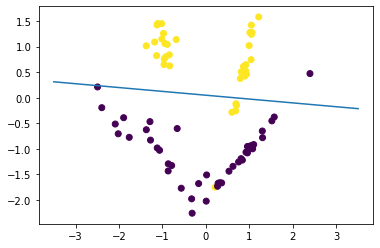

In [239]:
x_space = np.linspace(-3.5, 3.5, num=10)
y_space = -(x_space * model.coef_[0, 0] + model.intercept_) / model.coef_[0, 1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.plot(x_space, y_space)

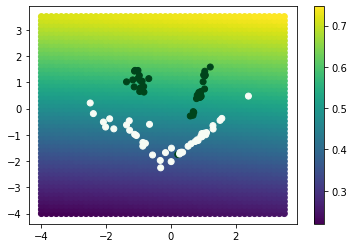

In [240]:
xy = np.stack(np.meshgrid(np.linspace(-4, 3.5), np.linspace(-4, 3.5)), axis=2)
xy = xy.reshape(-1, 2)
probas_xy = model.predict_proba(xy)
plt.scatter(xy[:, 0], xy[:, 1], c=probas_xy[:, 1])
plt.colorbar()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Greens)

In [241]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [242]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [243]:
probs = model.predict_proba(X_test)
probs = probs[:,1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.95


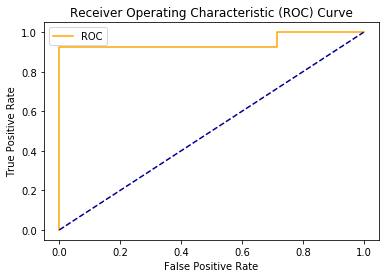

In [244]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

In [245]:
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
fpr

array([0.        , 0.        , 0.        , 0.71428571, 0.71428571,
       1.        ])

### Задание 2. Самостоятельная реализация вычисления AUC ROC. (3 балла)

Напишите функцию, которая берет на вход `numpy`-вектор правильных ответов `y` (из 0 и 1) и `numpy`-вектор вещественных предсказаний классификатора (длина обоих векторов равна числу объектов) и возвращает значение AUC ROC. Как обычно, можно пользоваться только средствами `numpy` :) Считайте, что в векторе `score_predicted` все элементы различны.

In [246]:
def roc_auc(y_test, y_pred):
    fpr = []
    tpr = []

Напишите юнит-тесты (не менее 3) к вашей реализации. Тест — это функция, которая подает на вход `roc_auc` некоторые заранее определенные векторы и проверяет корректность ответа (для заданных векторов вы знаете, какой должен быть ответ). Например, для вызова `roc_auc([0, 1], [0.2, 0.7])` функция должна вернуть 1. Тесты должны проверять разные сценарии работы функции (например, не нужно писать несколько тестов, которые проверяют что в случае идеального классификатора roc-auc равен 1). В юнит-тестах удобно использовать [assert](https://stackoverflow.com/questions/5142418/what-is-the-use-of-assert-in-python)-ы.

In [247]:
### your code here

### Задание 3. Обучение логистической регрессии на реальных данных и оценка качества классификации (4 балла)

Полезные функции и классы из scikit-learn для этого задания: confusion_matrix, precision_recall_curve, average_precision_score, train_test_split, StandardScaler, roc-curve, roc_auc_score.

Загрузим данные с конкурса [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [248]:
data = pd.read_csv('C:/Users/-/Downloads/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
data

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,2,2,5,1,0,0,1,0,0,0,...,9,1,5,8,0,1,1,0,0,1
9,1,1,7,0,0,0,0,1,0,0,...,3,1,1,9,0,1,1,0,1,0
13,5,4,9,1,0,0,0,1,0,0,...,4,2,7,7,0,1,1,0,1,0
16,0,1,2,0,0,1,0,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,2,0,1,0,1,0,0,0,0,...,3,1,1,3,0,0,0,1,1,0
19,5,1,4,0,0,0,0,0,1,0,...,4,2,0,9,0,1,0,1,1,1
20,2,1,3,1,0,0,1,0,0,0,...,3,0,0,10,0,1,0,0,1,0
22,5,1,4,0,0,1,0,0,0,0,...,7,1,3,6,1,0,1,0,1,0
26,5,1,3,1,0,0,0,1,0,0,...,4,2,1,5,0,1,0,0,0,1


Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.

In [249]:

np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Отнормируйте признаки (можно воспользоваться StandardScaler или сделать это вручную). Пока не будем обращать внимание на то, что некоторые признаки категориальные (этим мы займёмся позже).

In [250]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [251]:

model = LogisticRegression().fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
print('Accuracy = ',format(model.score(X_test_scaled,y_test)))

C:\Users\-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy =  0.58802


Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

In [252]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [253]:
probs = model.predict_proba(X_test_scaled)
probs = probs[:, 1]

In [254]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.63


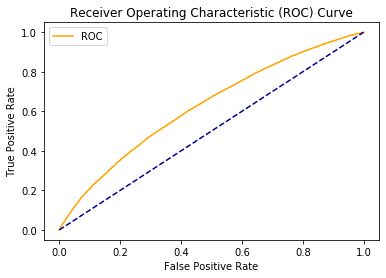

In [255]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

Предположим, что наш алгоритм должен обеспечивать полноту не менее 0.7. Какому порогу бинаризации вероятностей это будет соответствовать? Какую точность (precision) мы получим? Постройте матрицу ошибок для данного порога. Что вы можете сказать о таком алгоритме? (В свободной форме)

In [256]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

ROC-AUC:  0.520744095098715
PR-AUC:  0.5148037791330922


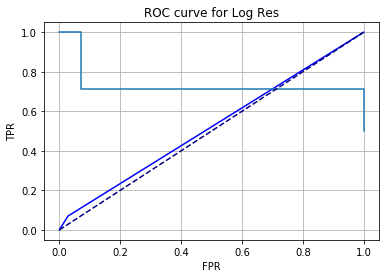

<Figure size 432x288 with 0 Axes>

In [260]:
### your code here
pred = model.predict_proba(X_test_scaled)[:,1] >= 0.7
roc = roc_auc_score(y_test, pred)
pr = average_precision_score(y_test, pred)
print("ROC-AUC: ", roc)
print("PR-AUC: ", pr)
fpr, tpr, threshold = roc_curve(y_test, pred)
plt.plot(fpr,tpr, color='b', label='Log')
plt.title('ROC curve for Log Res')
precision, recall, _= precision_recall_curve(y_test, pred)
plt.step(recall, precision)
 
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()
plt.gcf().clear()

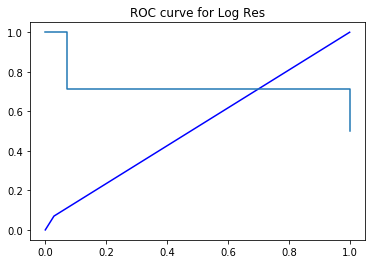

In [258]:
fpr, tpr, threshold = roc_curve(y_test, pred)
plt.plot(fpr,tpr, color='b', label='Log')
plt.title('ROC curve for Log Res')
precision, recall, _= precision_recall_curve(y_test, pred)
plt.step(recall, precision)

### Задание 4. Кодирование категориальных признаков (1 балл)

Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество моделей. Измерьте время, потребовавшееся на обучение модели.

In [281]:
### your code here
data1 = pd.read_csv('C:/Users/-/Downloads/train.csv', index_col=0)
from sklearn.preprocessing import OneHotEncoder
df1 = pd.DataFrame(data1)
cat = [cols for cols in df1.columns if 'cat' in cols]
cat
catsub = data1[['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']]
onehot = pd.get_dummies(catsub)
df1 = df1.drop(catsub,axis=1)
data1 = df1.join(onehot)


### Задание 5. Калибровка вероятностей (4 балла)

В этом задании предлагается самостоятельно разобраться с калибровкой вероятностей. Для этого можно прочитать первый раздел в [конспекте](https://github.com/esokolov/ml-course-hse/blob/master/2018-fall/seminars/sem06.pdf).

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [273]:
def plot_calibration_curve(y_test, pred):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    segment_width = 1.0 / n_bins
    for i in range(n_bins):
        left = segment_width * i
        right = segment_width * (i + 1)
        bin_middle_points.append((left + right) // 2)
        bin_real_ratios.append(
            np.min(y_test[(pred >= left) & (pred < right)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочную кривую для логистической регрессии (на той же самой выборке с тем же самым разбиением — можно использовать уже полученные ранее предсказания). Изучите распределение ответов классификатора (постройте гистограмму с помощью `plt.hist`).

In [ ]:
### your code here

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей логистической регресии на обучении и постройте с его помощью предсказание для тестовой выборки. Нарисуйте на одном графике калибровочную кривую до и после калибровки. Есть ли улучшения?

In [ ]:
### your code here

Что будет, если усилить регуляризацию логистической регресии в $10^3$ раз? Нарисуйте на одном графике калибровочную кривую для сильно регуляризованной регресии и для неё же после калибровки. Есть ли улучшения?

In [ ]:
### your code here